In [ ]:
import pandas as pd

df = pd.read_csv("/content/city_day.csv")

display(df.head())
display(df.describe())
display(df.info())

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


None

In [ ]:
display(df.isnull().sum())

,0
City,0
Date,0
PM2.5,4598
PM10,11140
NO,3582
NO2,3585
NOx,4185
NH3,10328
CO,2059
SO2,3854


In [ ]:
for col in ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']:
    df[col] = df[col].fillna(df[col].mean())

df['AQI_Bucket'] = df['AQI_Bucket'].fillna('Unknown')

display(df.isnull().sum())

,0
City,0
Date,0
PM2.5,0
PM10,0
NO,0
NO2,0
NOx,0
NH3,0
CO,0
SO2,0


In [ ]:
pollutant_cols = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']
correlation_matrix = df[pollutant_cols].corr()

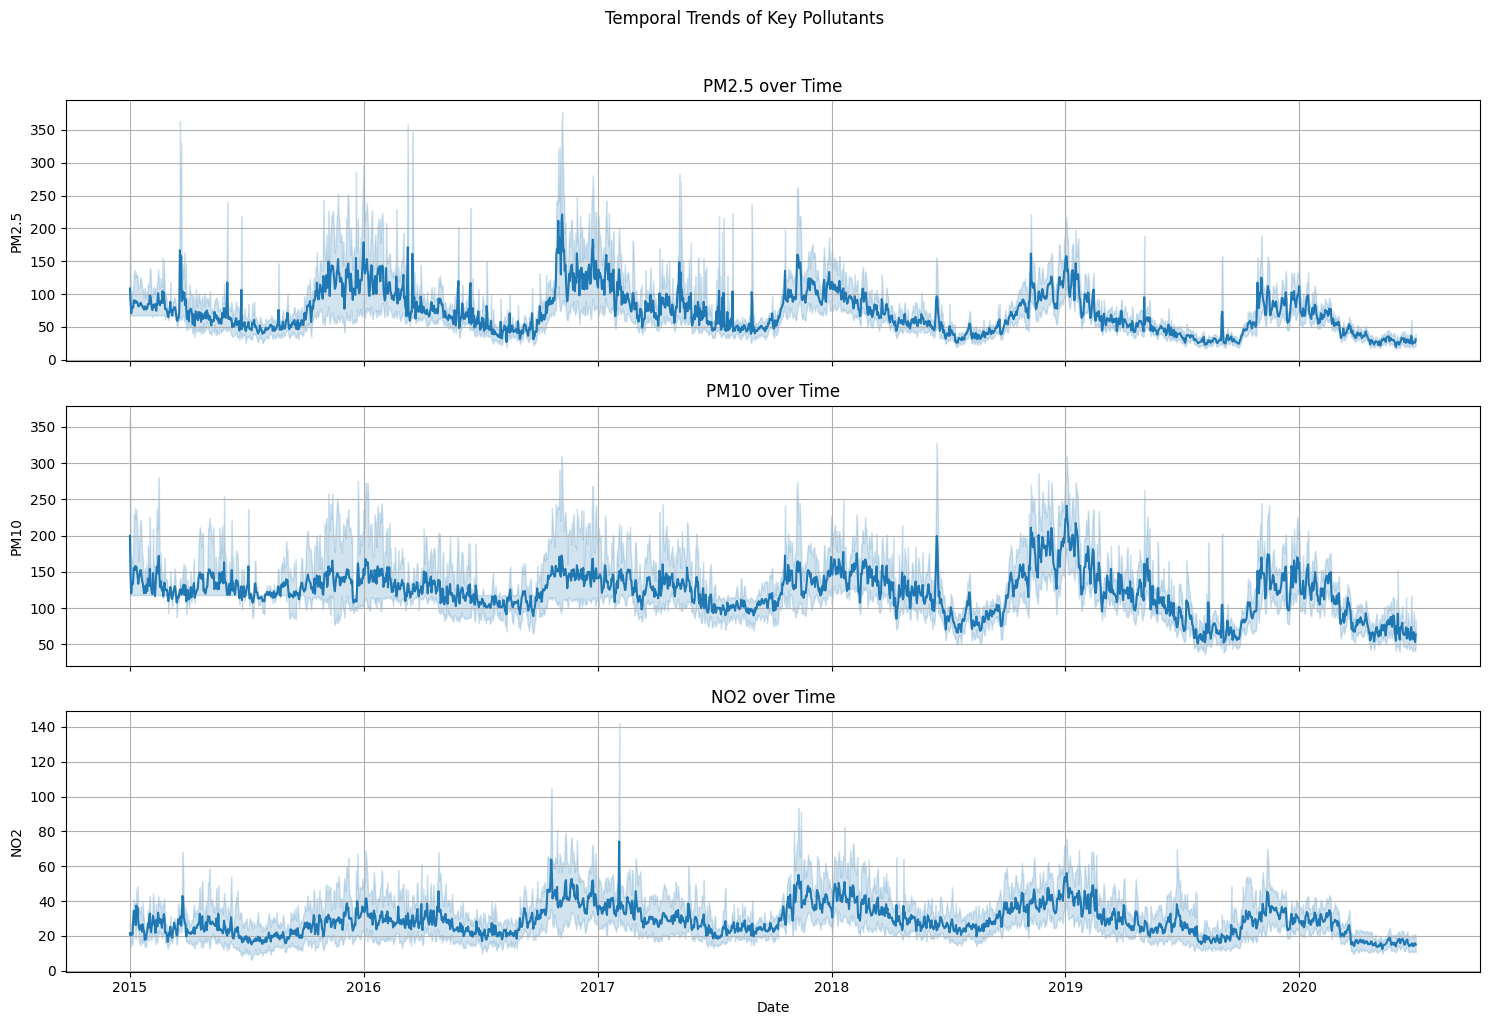

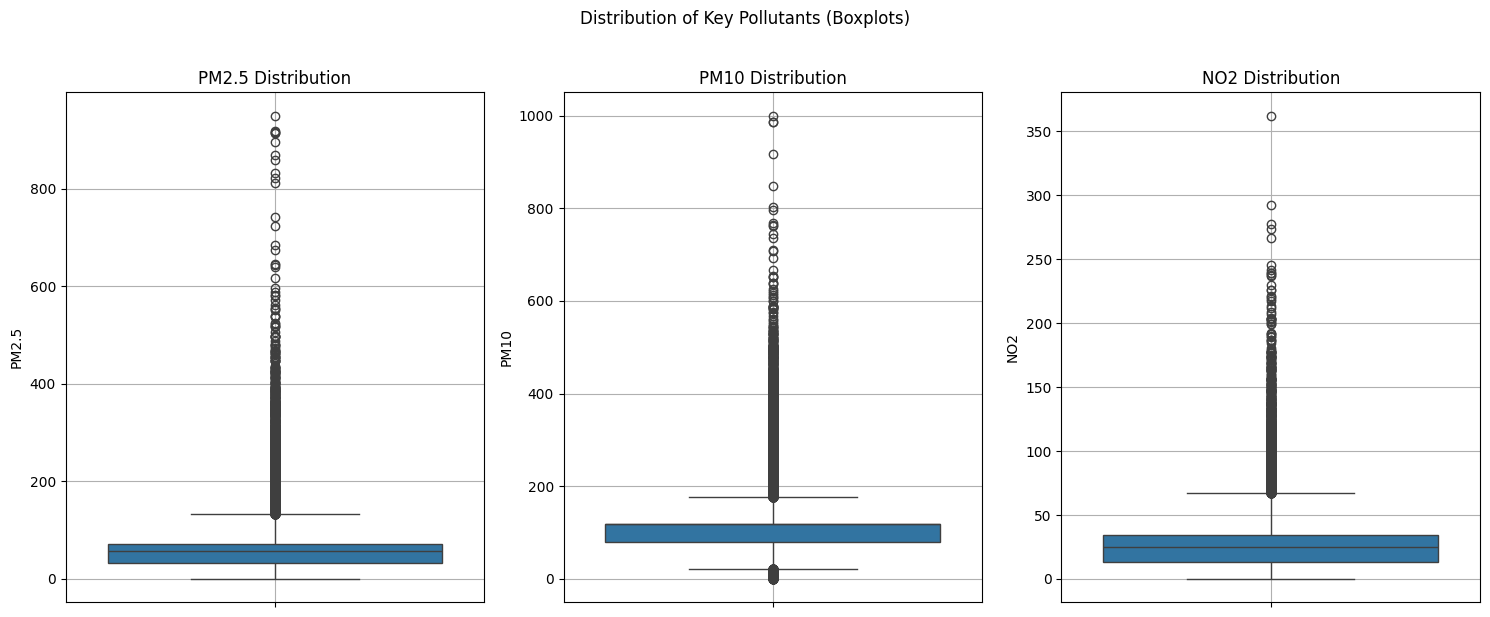

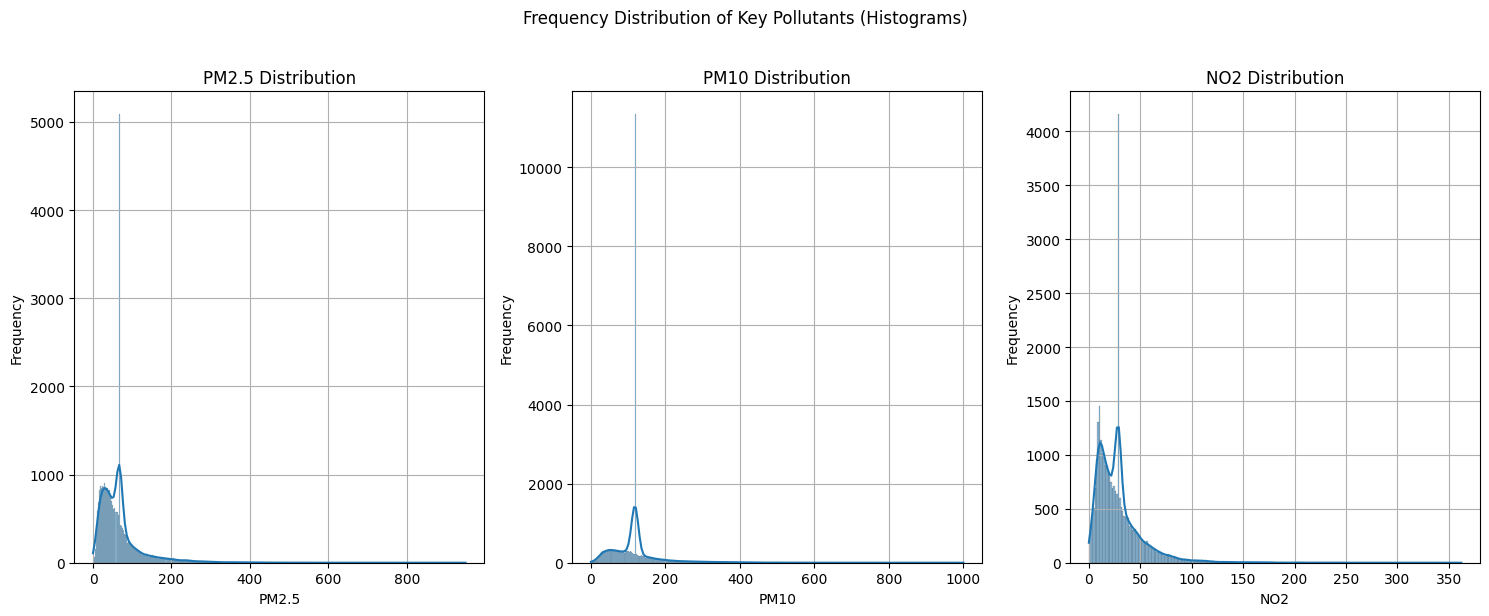

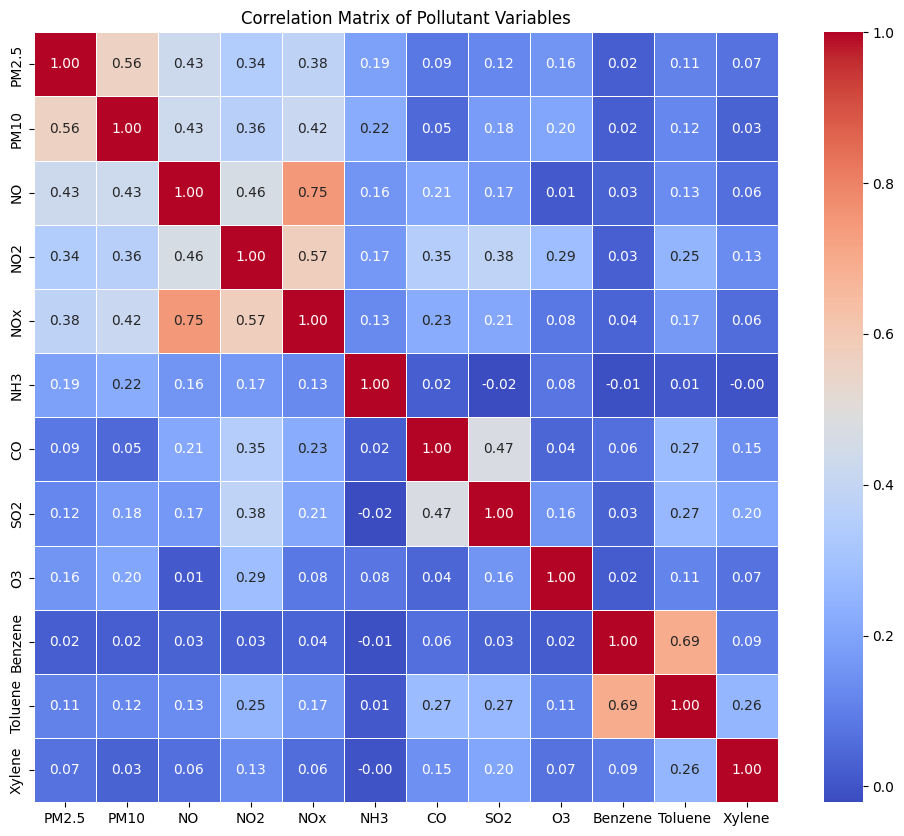

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Date' column to datetime objects for temporal plotting
df['Date'] = pd.to_datetime(df['Date'])

# 1. Line plots for temporal trends
key_pollutants = ['PM2.5', 'PM10', 'NO2']
fig, axes = plt.subplots(len(key_pollutants), 1, figsize=(15, 10), sharex=True)
fig.suptitle('Temporal Trends of Key Pollutants', y=1.02)

for i, col in enumerate(key_pollutants):
    sns.lineplot(ax=axes[i], x='Date', y=col, data=df)
    axes[i].set_title(f'{col} over Time')
    axes[i].set_ylabel(col)
    axes[i].grid(True)

plt.tight_layout()
plt.show()

# 2. Boxplots for distribution and outliers
fig, axes = plt.subplots(1, len(key_pollutants), figsize=(15, 6))
fig.suptitle('Distribution of Key Pollutants (Boxplots)', y=1.02)

for i, col in enumerate(key_pollutants):
    sns.boxplot(ax=axes[i], y=col, data=df)
    axes[i].set_title(f'{col} Distribution')
    axes[i].set_ylabel(col)
    axes[i].grid(True)

plt.tight_layout()
plt.show()

# 3. Histograms for frequency distribution
fig, axes = plt.subplots(1, len(key_pollutants), figsize=(15, 6))
fig.suptitle('Frequency Distribution of Key Pollutants (Histograms)', y=1.02)

for i, col in enumerate(key_pollutants):
    sns.histplot(ax=axes[i], x=col, data=df, kde=True)
    axes[i].set_title(f'{col} Distribution')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

# 4. Heatmap for correlation analysis
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Pollutant Variables')
plt.show()